# 01. Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [2]:
# Configure API key 

quandl.ApiConfig.api_key = 'QFtweSdZE6fHgqsTQVBn'

In [4]:
# Importing the Geothermal and Biomass Power Consumption - Total Europe variable.

data = quandl.get('BP/GEO_CONSUM_EUR')

In [28]:
# link to the used data

# https://data.nasdaq.com/data/BP/GEO_CONSUM_EUR-geothermal-and-biomass-power-consumption-total-europe

# 02. Task 6.6

In [5]:
data.head(5)

,Value
Date,
1965-12-31,3.009000
1966-12-31,4.101000
1967-12-31,4.489000
1968-12-31,4.997000
1969-12-31,5.422904


In [6]:
data.tail(5)

,Value
Date,
2017-12-31,211.301247
2018-12-31,218.921978
2019-12-31,228.015103
2020-12-31,234.354551
2021-12-31,247.935179


In [7]:
data.shape

(57, 1)

In [8]:
data.columns

Index(['Value'], dtype='object')

In [9]:
type(data)

pandas.core.frame.DataFrame

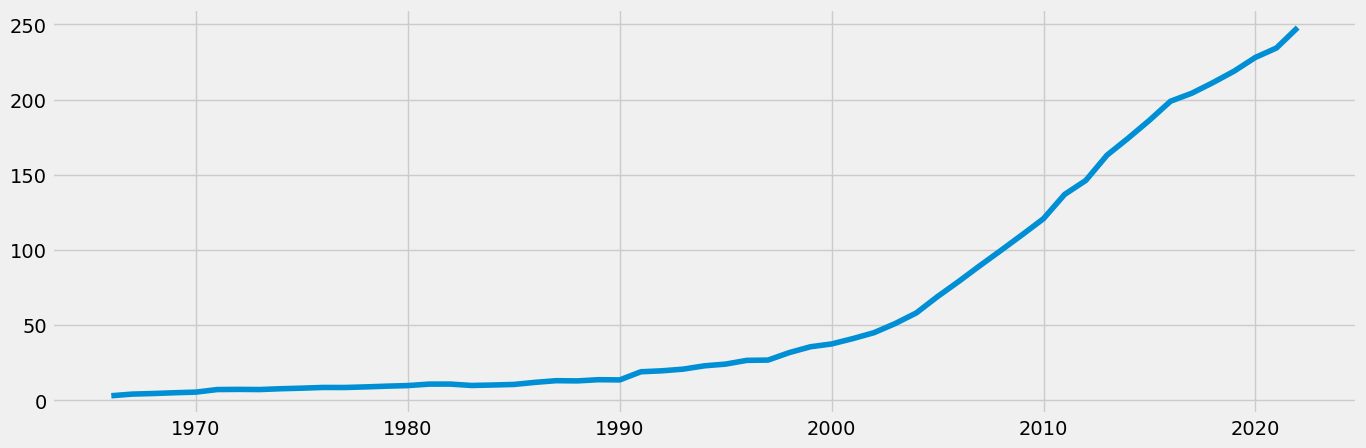

In [10]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 


plt.plot(data)

### Time-series analysis: decomposition

In [11]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [12]:
#  Define a fixed size for all special charts.

from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

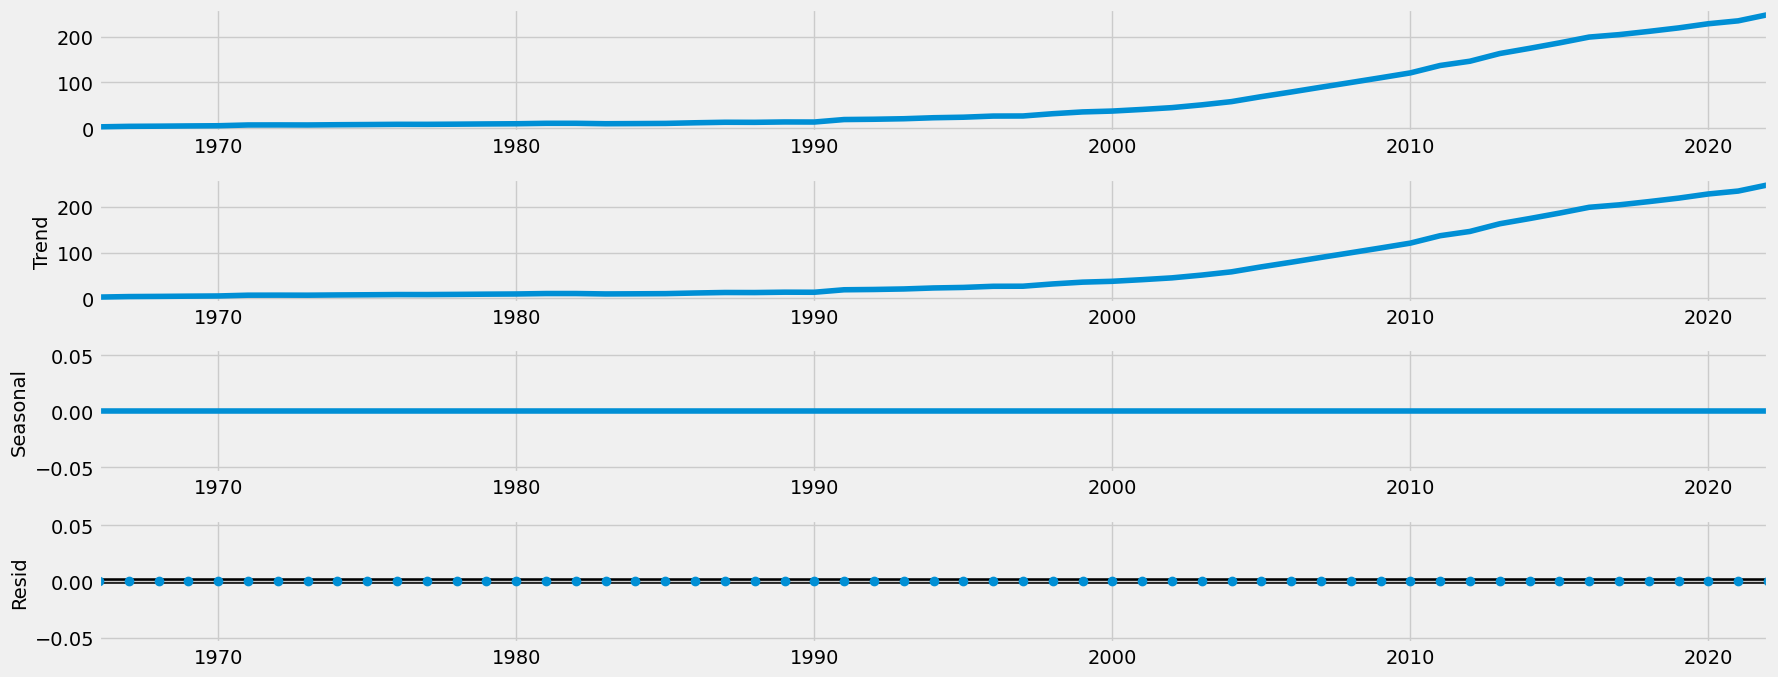

In [13]:
# Plot the separate components

decomposition.plot()
plt.show()

### The first chart in the figure above is the data itself AKA as the level.
### The second is the underlying trend. And the level and trend appear the same. We have a rising trend in the chart.
### The third component is the seasonality and we can see that we have no seasonality in this case.
### And last is the noise—or AKA the “residual”. We can see here that there isn’t any noise in the data.

# Testing for stationarity

In [14]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.586429
p-value                         0.987276
Number of Lags Used             2.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


### Using critical value of 5%, we get a value of -2.916770. While, the test statistic is 0.586429, which shows that it is larger than critical value. This means that the null hypothesis cannot be rejected. In other words, there is a unit root in our data and our data is non-stationary. 

### Using p-value, which indicates whether the test result is significant with a P-value of 0.987276 that is much larger than 0.05 we can conclude that the test is not significant.

### Null Hypothesis = Unit root present (non-stationary)  
### Alternative Hypothesis = Unit root not present (stationary)

### - If test statistic larger than critical value = can’t reject null hypothesis.
### - If test statistic smaller than critical value = can reject null hypothesis

#  Stationarizing the Data

In [16]:
data_diff = data - data.shift(1)

In [17]:
#  Remove the missing values that came about as a result of the differencing.

data_diff.dropna(inplace = True) 

In [18]:
data_diff.head()

,Value
Date,
1966-12-31,1.092000
1967-12-31,0.388000
1968-12-31,0.508000
1969-12-31,0.425904
1970-12-31,1.695453


In [19]:
data_diff.columns

Index(['Value'], dtype='object')

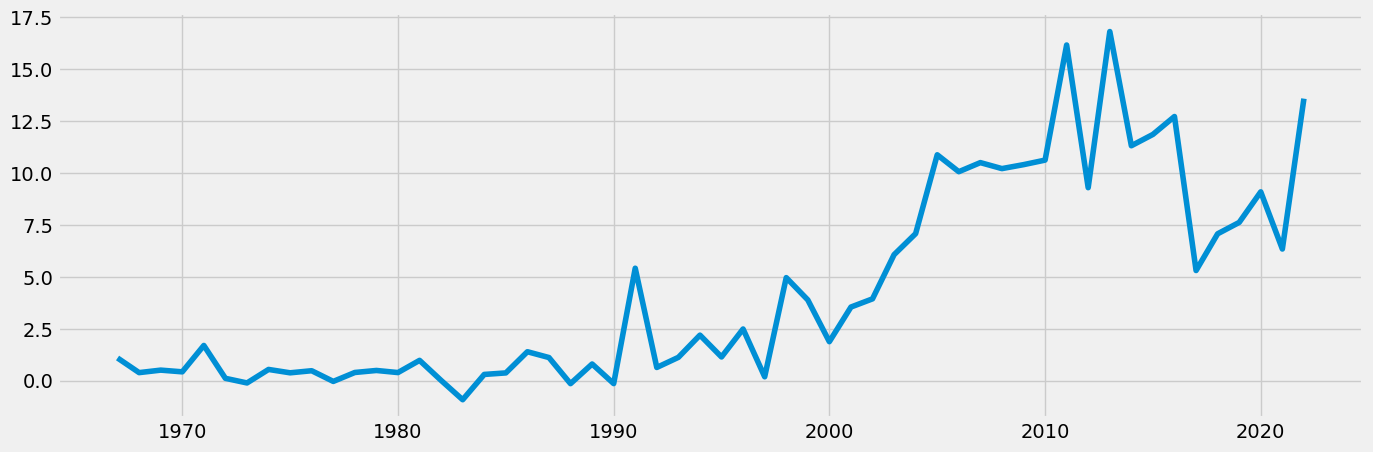

In [20]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [21]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -0.752259
p-value                         0.832745
Number of Lags Used             1.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


### Using critical value of 5%, we get a value of -2.916770. While, the test statistic is -0.752259, which shows that it is larger than critical value. This means that we need to do Stationarizing of the Data again.

### Using p-value, which indicates whether the test result is significant with a P-value of 0.832745 that is much larger than 0.05 we can conclude that the test is not significant.

### Null Hypothesis = Unit root present (non-stationary)  
### Alternative Hypothesis = Unit root not present (stationary)

### - If test statistic larger than critical value = can’t reject null hypothesis.
### - If test statistic smaller than critical value = can reject null hypothesis

#  Stationarizing the Data 2nd time

In [22]:
data_diff1 = data_diff - data_diff.shift(1)

In [23]:
#  Remove the missing values that came about as a result of the differencing.

data_diff1.dropna(inplace = True) #  remove the missing values that came about as a result of the differencing. 

In [24]:
data_diff.head()

,Value
Date,
1966-12-31,1.092000
1967-12-31,0.388000
1968-12-31,0.508000
1969-12-31,0.425904
1970-12-31,1.695453


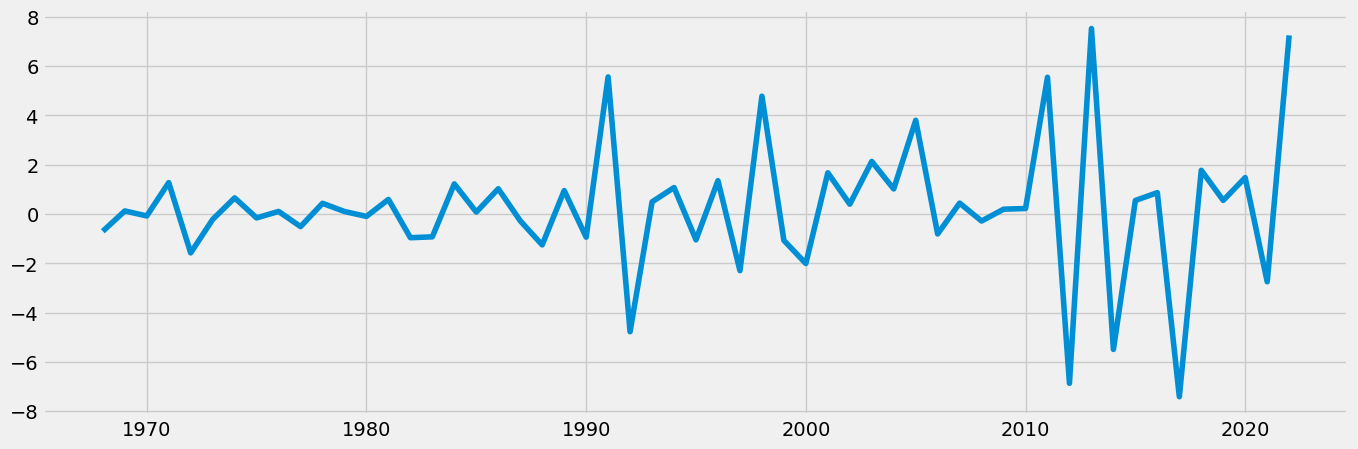

In [25]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff1)

In [26]:
dickey_fuller(data_diff1)

Dickey-Fuller Stationarity test:
Test Statistic                -1.394727e+01
p-value                        4.772145e-26
Number of Lags Used            0.000000e+00
Number of Observations Used    5.400000e+01
Critical Value (1%)           -3.557709e+00
Critical Value (5%)           -2.916770e+00
Critical Value (10%)          -2.596222e+00
dtype: float64


### Using critical value of 5%, we get a value of -2.916770. While, the test statistic is -1.394727e+01, which shows that it is smaller than the critical valueand that the data is  stationary.

### Using p-value, which indicates whether the test result is significant with a P-value of 4.772145e-26 that is much smaller than 0.05 we can conclude that the test is significant.

### Null Hypothesis = Unit root present (non-stationary)  
### Alternative Hypothesis = Unit root not present (stationary)

### - If test statistic larger than critical value = can’t reject null hypothesis.
### - If test statistic smaller than critical value = can reject null hypothesis

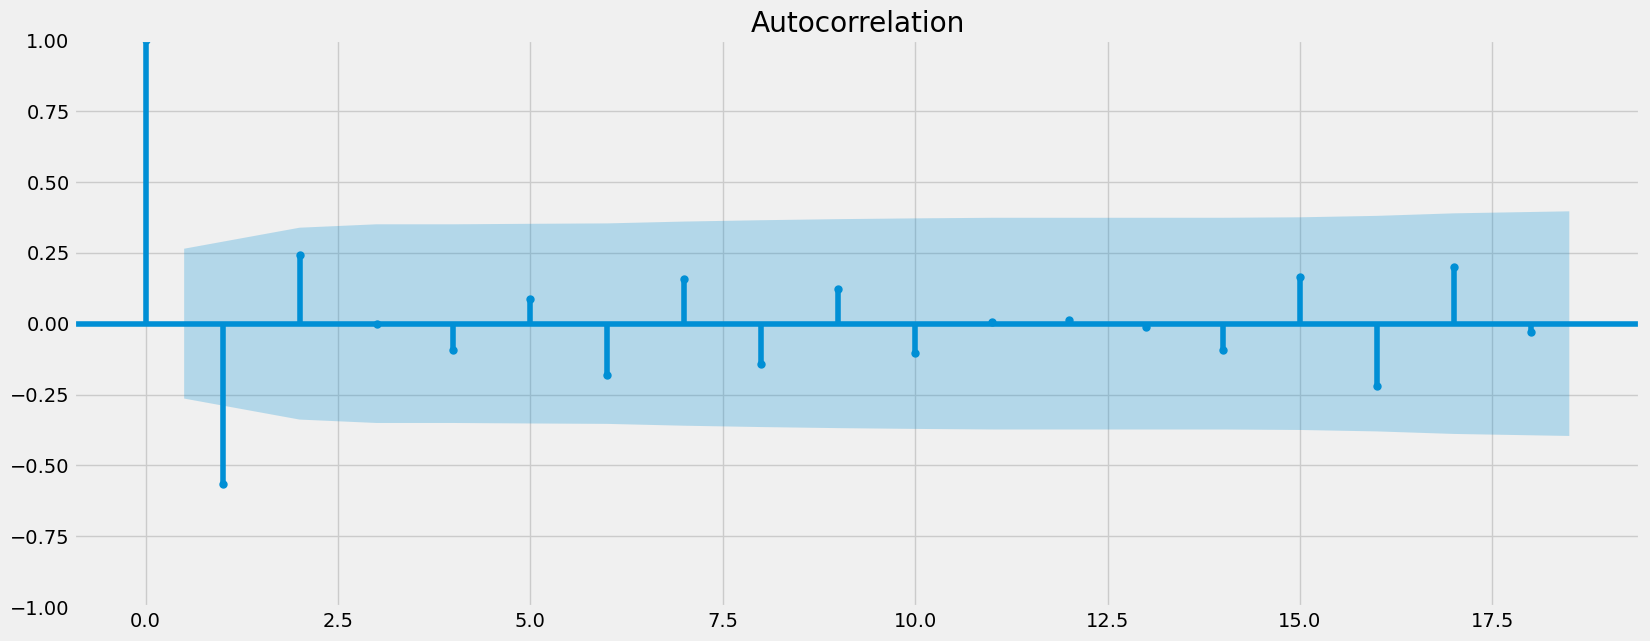

In [27]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_diff1)
plt.show()

## We have only two vertical lines that go above the blue edge of the confidence interval, this means that autocorrelation plot  is not perfect but also that the data is stationary